## 1. Setup dependencies

In [1]:
import os
import tensorflow as tf

2025-05-04 12:50:32.246368: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 12:50:33.400698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-04 12:50:35.821364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
data_dir = 'data'

In [2]:
# os.path.join('data', 'happy') 
# it generates universal path which makes the program to run of any os
# it returns a path format suitable to the os in which it is used
# os.listdir()
# it lists the files inside a directory

In [3]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print(gpus)
# len(gpus)

In [4]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())


In [5]:
# tf.keras.backend.clear_session()

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)  # Memory growth must be set before GPUs have been initialized

2025-05-04 12:50:40.526631: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-04 12:50:40.935940: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-04 12:50:40.936064: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [6]:
# img = cv2.imread('data/happy/1.jpg')
# img.shape

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
# # SINCE cv2 reads image in BGR mode not RGB so we need to convert into RGB color channel while displaying 

## 2. Loading Data

In [7]:
import cv2
import imghdr
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipykernel_64212/488359632.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png', 'JPEG', 'JPG', 'BMP', 'PNG']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            with Image.open(image_path) as img:
                if img.format not in image_exts:
                    print("Image not in extension list {}".format(image_path))
                    os.remove(image_path)

        except Exception as e:
            print("Issue with image {}".format(image_path))

In [10]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [11]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32)
# this make a data pipeline rather than loading all the data in the memory at once
# useful for larger set of data
type(data)

Found 328 files belonging to 2 classes.


2025-05-04 12:50:44.684420: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-04 12:50:44.684512: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-04 12:50:44.684531: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-04 12:50:45.112689: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-04 12:50:45.112753: I external/local_xla/xla/stream_executor

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [13]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f3b95bf84d0>)

In [14]:
# get another batch
batch = data_iterator.next()

In [15]:
# Image representation as numpy array per batch
batch[0].shape

(32, 256, 256, 3)

In [16]:
# labels for each image in a batch as a numpy array
batch[1]

########## labels for two classes are as under:
# 0 - happy people
# 1 - sad people

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

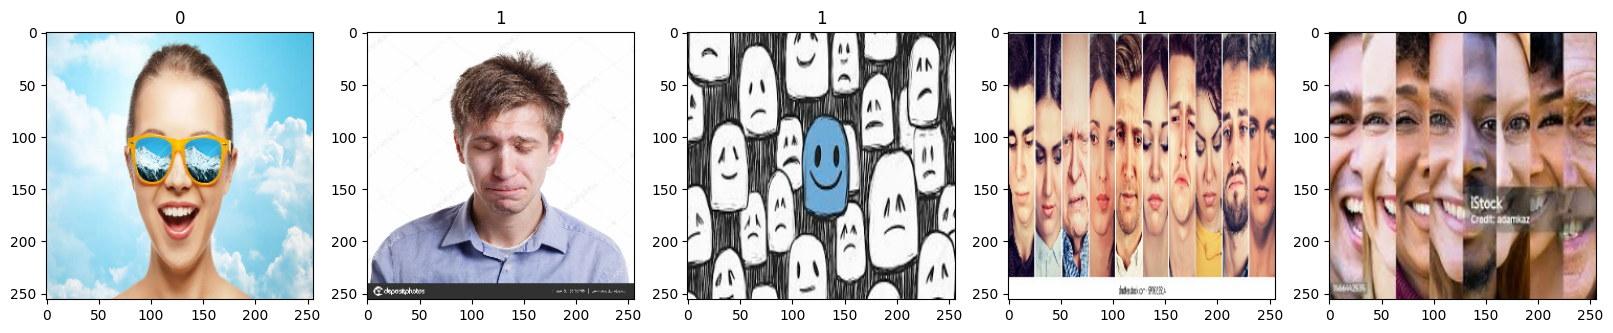

In [17]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3. Preprocess data

In [18]:
# Scale data
data = data.map(lambda x, y: (x/255, y))
# map() helps to transform data in the pipeline only while fetching it from the disk

scaled_iterator = data.as_numpy_iterator()
scaled_batch = scaled_iterator.next()

In [19]:
scaled_batch[0].min()

0.0

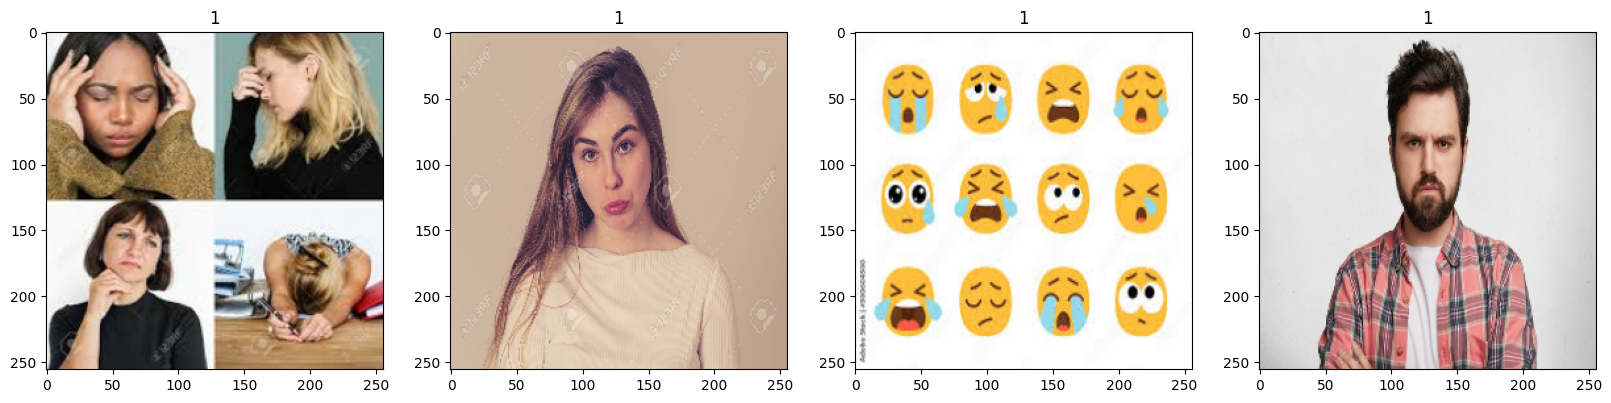

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

In [21]:
# Splitting data

In [22]:
len(data)

11

In [23]:
train_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)+1

In [24]:
train_size + validation_size + test_size

11

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

In [26]:
len(train) + len(val) + len(test)

11

## Deep Model

In [27]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()

In [29]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [30]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [32]:
# creating logs
logdir = 'logs'

In [33]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/20


I0000 00:00:1746363054.833298   64358 service.cc:145] XLA service 0x7f3ac0205e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746363054.835152   64358 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-05-04 12:50:55.241919: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-04 12:50:55.797263: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1746363062.103488   64358 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.4670 - loss: 1.4343 - val_accuracy: 0.5000 - val_loss: 0.6844
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ -1s -142266us/step - accuracy: 0.5278 - loss: 0.7066 - val_accuracy: 0.5000 - val_loss: 0.6808
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6693 - loss: 0.6504 - val_accuracy: 0.7500 - val_loss: 0.6116
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8010 - loss: 0.5999 - val_accuracy: 0.7500 - val_loss: 0.5613
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7513 - loss: 0.5253 - val_accuracy: 0.7656 - val_loss: 0.4594
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7895 - loss: 0.4299 - val_accuracy: 0.7656 - val_loss: 0.4397
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8559 - loss: 0.3816 - val_accuracy: 0.8281 - val_loss: 0.3668
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8786 - loss: 0.3211 - val_accuracy: 0.8594 - val_loss: 0.27

2025-05-04 12:51:11.023919: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166336 bytes after encountering the first element of size 25166336 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9510 - loss: 0.2186 - val_accuracy: 0.9375 - val_loss: 0.1407
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.9391 - loss: 0.1537 - val_accuracy: 0.9688 - val_loss: 0.0998
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9624 - loss: 0.1199 - val_accuracy: 0.9688 - val_loss: 0.1220
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9916 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 0.0415
Epoch 14/20


2025-05-04 12:51:15.720752: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9952 - loss: 0.0363 - val_accuracy: 0.9688 - val_loss: 0.0839
Epoch 15/20


2025-05-04 12:51:16.834011: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9815 - loss: 0.0540 - val_accuracy: 0.9844 - val_loss: 0.0494
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9718 - loss: 0.0515 - val_accuracy: 0.9844 - val_loss: 0.2225
Epoch 17/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.0119

2025-05-04 12:51:19.127261: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166336 bytes after encountering the first element of size 25166336 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.9916 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 18/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.0209

2025-05-04 12:51:20.306006: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25166080 bytes after encountering the first element of size 25166080 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.9926 - loss: 0.1337 - val_accuracy: 1.0000 - val_loss: 0.0321
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9989 - loss: 0.0326 - val_accuracy: 0.9844 - val_loss: 0.0456
Epoch 20/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9858 - loss: 0.0496 - val_accuracy: 1.0000 - val_loss: 0.0116


In [38]:
type(hist)

keras.src.callbacks.history.History

In [35]:
hist.history

{'accuracy': [0.4732142984867096,
  0.4732142984867096,
  0.6696428656578064,
  0.7857142686843872,
  0.7633928656578064,
  0.7589285969734192,
  0.8526785969734192,
  0.8571428656578064,
  0.8794642686843872,
  0.9508928656578064,
  0.9196428656578064,
  0.9732142686843872,
  0.9910714030265808,
  0.9955357313156128,
  0.9821428656578064,
  0.9866071343421936,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808],
 'loss': [1.2122877836227417,
  0.723544180393219,
  0.6547742486000061,
  0.5851835608482361,
  0.5104225277900696,
  0.46041497588157654,
  0.38808655738830566,
  0.33664584159851074,
  0.2849501967430115,
  0.2077745497226715,
  0.18877209722995758,
  0.10480266809463501,
  0.0556366965174675,
  0.03179856762290001,
  0.053595930337905884,
  0.03572313115000725,
  0.027007415890693665,
  0.1327260136604309,
  0.03710665926337242,
  0.03336821869015694],
 'val_accuracy': [0.5,
  0.5,
  0.75,
  0.75,
  0.765625,
  0.765625,
  0.828125,
  0.

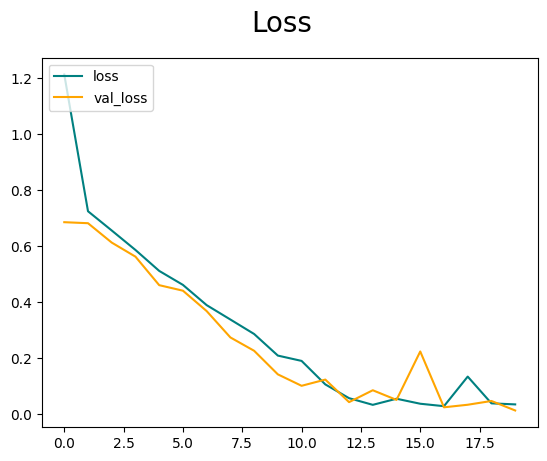

In [36]:
# Plotting performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

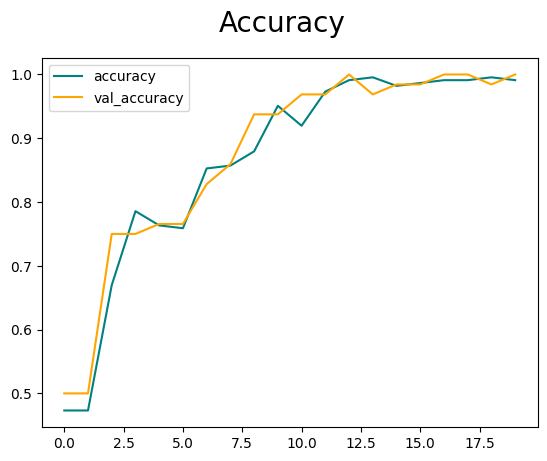

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluate Performance

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X) # predicted value by model 
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


2025-05-04 13:11:17.549820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 0.9411764740943909, Recall: 1.0, Accuracy: 0.9750000238418579


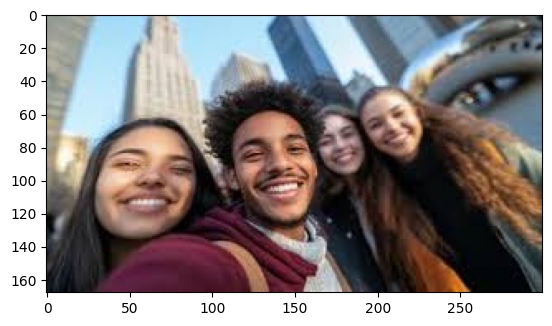

In [96]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

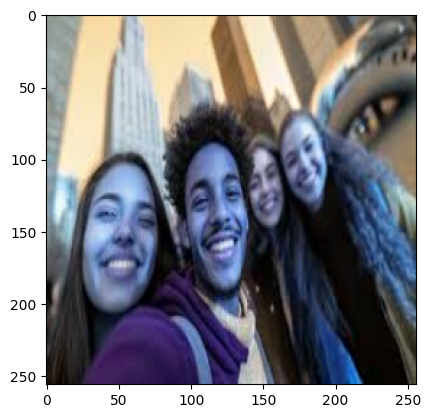

In [97]:
resize_img = tf.image.resize(img, (256, 256))
plt.imshow(resize_img.numpy().astype(int))
plt.show()

In [98]:
resize_img.shape

TensorShape([256, 256, 3])

In [99]:
np.expand_dims(resize_img, 0).shape
# It adds extra dimension 

(1, 256, 256, 3)

In [100]:
yhat_test1 = model.predict(np.expand_dims(resize_img/255, 0)) 
yhat_test1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.00473735]], dtype=float32)

In [101]:
if yhat_test1 > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## Save the Model

In [102]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'happySadModel.h5'))
# '.h5' is a serializing file format kinda similar like zip.
#  this is kearas model so we can use all kearas methods with it

In [104]:
new_model = load_model(os.path.join('models', 'happySadModel.h5'))

In [107]:
yhat_model_test = new_model.predict(np.expand_dims(resize_img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [108]:
yhat_model_test

array([[0.00473735]], dtype=float32)

In [109]:
if yhat_model_test > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
